<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_07_Metaparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the necessary libraries
## DL Modeling
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

## Numerical Analysis
import numpy as np
import scipy.stats as stats

## Dataset Management
import pandas as pd

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## High-Quality Figures
from IPython import display
display.set_matplotlib_formats("svg")

# Wine Quality Dataset

In [ ]:
# Download the data from original database
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url, sep = ";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
# Summarize the data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# List the number of unique values per column
for i in data.keys():
    print("{} has {} unique values".format(i, len(np.unique(data[i]))))

fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


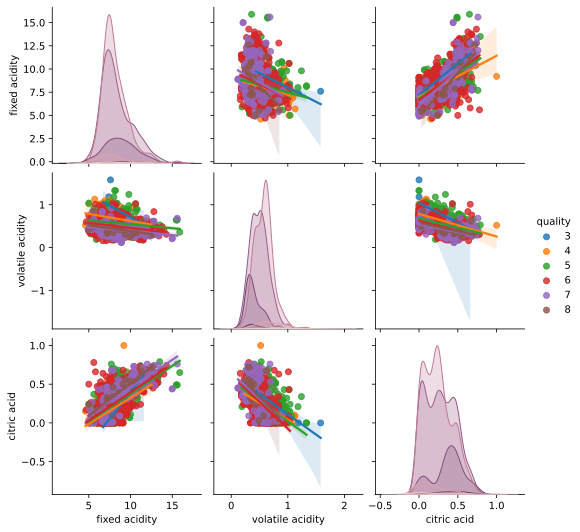

In [ ]:
# Pairwise plots
cols2plot = ["fixed acidity", "volatile acidity", "citric acid", "quality"]
sns.pairplot(data[cols2plot], kind="reg", hue ="quality")
plt.show()

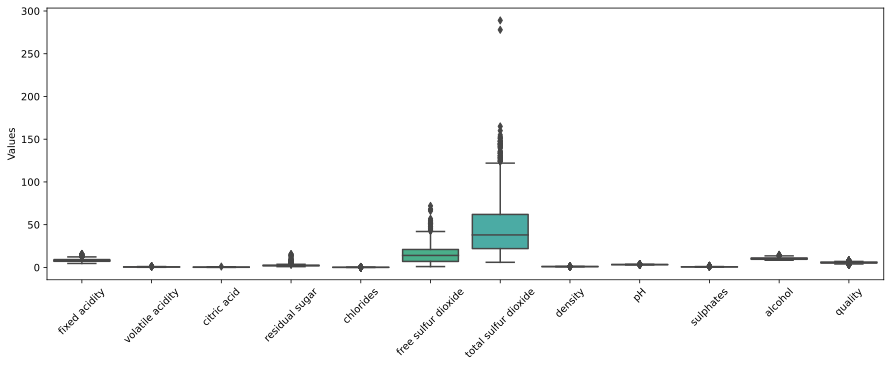

In [ ]:
# Use boxplots
fig, ax = plt.subplots(1, figsize=(15,5))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Values")
plt.show()

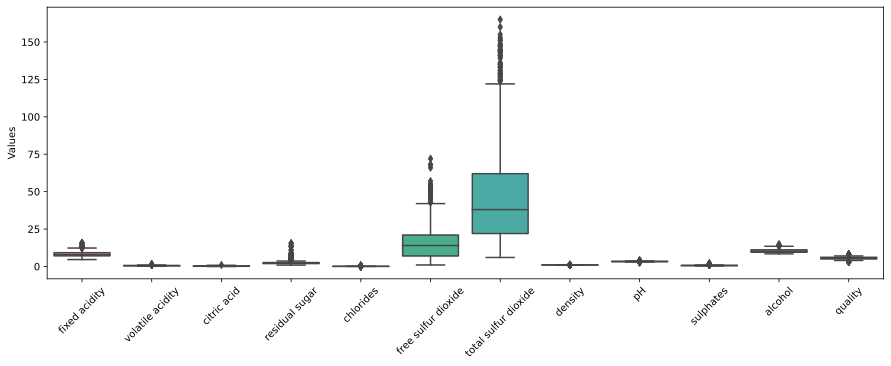

In [ ]:
# Let's remove rows with very big outliers
fig, ax = plt.subplots(1, figsize=(15,5))
ax = sns.boxplot(data = data[data["total sulfur dioxide"] < 200])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Values")
plt.show()

In [ ]:
# Reassign the data with the two outliers removed completely
data = data[data["total sulfur dioxide"] < 200]

# Z-Score all variables except quality
# Find the columns we want to normalize (all except quality)

cols2zscore = data.keys()
cols2zscore = cols2zscore.drop("quality")

# Long way
for col in cols2zscore:
    meanval = np.mean(data[col])
    stdev = np.std(data[col], ddof=1)
    data[col] = (data[col] - meanval)/stdev

# Can be done in a single shot
# data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1597.000000
mean,-1.652668e-14,-1.793320e-15,5.880498e-15,-9.376066e-16,5.098127e-15,6.366229e-17,-1.349022e-16,4.467943e-13,-2.419966e-15,-1.921236e-15,2.247267e-14,5.634314
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.806630
min,-2.135419e+00,-2.280048e+00,-1.391387e+00,-1.168783e+00,-1.604073e+00,-1.422392e+00,-1.262186e+00,-3.545821e+00,-3.708218e+00,-1.936711e+00,-1.898626e+00,3.000000
25%,-7.003882e-01,-7.715838e-01,-9.283861e-01,-4.524372e-01,-3.720247e-01,-8.476045e-01,-7.594598e-01,-6.109478e-01,-6.585382e-01,-6.390204e-01,-8.650444e-01,5.000000
50%,-2.411785e-01,-4.528645e-02,-5.382836e-02,-2.375335e-01,-1.808448e-01,-1.770192e-01,-2.567340e-01,-6.214425e-04,-9.670044e-03,-2.261189e-01,-2.073106e-01,6.000000
75%,5.050372e-01,6.251419e-01,7.692848e-01,4.900487e-02,5.281955e-02,4.935662e-01,4.973546e-01,5.778618e-01,5.743113e-01,4.227263e-01,6.383472e-01,6.000000
max,4.350918e+00,5.876831e+00,3.753070e+00,9.289866e+00,1.112001e+01,5.379259e+00,3.733652e+00,3.682565e+00,4.532407e+00,7.913939e+00,4.208902e+00,8.000000


In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528185,0.960356,-1.391387,-0.452437,-0.244571,-0.464413,-0.382415,0.556633,1.288066,-0.580034,-0.959006,5
1,-0.298580,1.965999,-1.391387,0.049005,0.222757,0.876758,0.654456,0.025914,-0.723425,0.127797,-0.583159,5
2,-0.298580,1.295570,-1.185609,-0.165899,0.095304,-0.081221,0.245992,0.132058,-0.334104,-0.049161,-0.583159,5
3,1.653061,-1.386143,1.489509,-0.452437,-0.265814,0.110375,0.434514,0.662777,-0.982972,-0.462063,-0.583159,6
4,-0.528185,0.960356,-1.391387,-0.452437,-0.244571,-0.464413,-0.382415,0.556633,1.288066,-0.580034,-0.959006,5


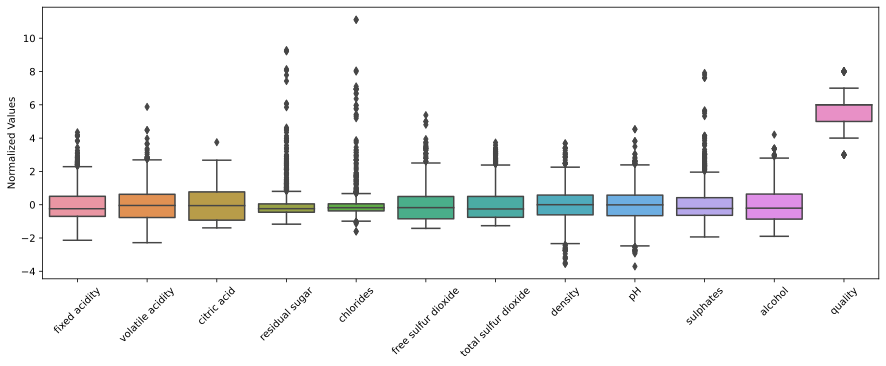

In [ ]:
# Plot again
fig, ax = plt.subplots(1, figsize=(15,5))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Normalized Values")
plt.show()

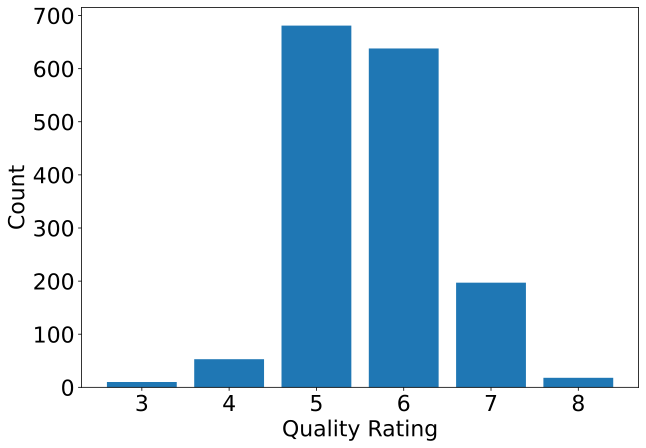

In [ ]:
# Lets check the distribution of quality values
fig = plt.figure(figsize=(10,7))
# Increase the fontsize in the figure
plt.rcParams.update({"font.size": 22})

counts = data["quality"].value_counts()
plt.bar(list(counts.keys()), counts)
plt.xlabel("Quality Rating")
plt.ylabel("Count")
plt.show()

In [ ]:
# The data is very imbalanced, and for DL this is a big problem
# We will threshold the quality and binarize it to low and high quality wine
# Create a new column for binarized (boolean) wine quality
data["boolQuality"] = 0
data["boolQuality"][data["quality"] > 5] = 1
data[["quality", "boolQuality"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [ ]:
# Convert the data into tensors
dataT = torch.tensor(data[cols2zscore].values).float()
labels = torch.tensor(data["boolQuality"].values).float()

print(dataT.shape)
print(labels.shape)

# We need the labels to be tensor
labels = labels[:,None]
print(labels.shape)

torch.Size([1597, 11])
torch.Size([1597])
torch.Size([1597, 1])


In [ ]:
# Split the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labels, test_size = 0.1)

# Convert to Pytorch datasets
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Translate to dataloader objects
batchsize = 64
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [ ]:
# Check the sizes of batches
for X,y in train_loader:
    print(X.shape, y.shape)

torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])


# Minibatch Size Effect

In [2]:
import time
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# We will use the data processed above
# Define the model Class
class ANNwine(nn.Module):
    def __init__(self):
        super().__init__()

        # Input layer
        self.input = nn.Linear(11,16)

        # Define two hidden layers
        self.fc1 = nn.Linear(16,32) # fc = fully connected
        self.fc2 = nn.Linear(32,32)

        # Define the output layer
        self.output = nn.Linear(32,1)

    # Forwad Pass
    def forward(self,x):
        x = F.relu(self.input(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        return self.output(x)

In [ ]:
# Time to train
numepochs = 1000

def trainTheModel():

    # Loss function and optimizer
    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(winenet.parameters(), lr = 0.01)

    # Initialize the losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    # Loop over the epochs
    for epochi in range(numepochs):

        # switch on he training mode
        winenet.train()

        # Loop over the training data batches
        batchAcc = []
        batchLoss = []

        for X,y in train_loader:

            # Forward pass and loss
            yHat = winenet(X)
            loss = lossfun(yHat,y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from single batch
            batchLoss.append(loss.item())

            # Training Accuracy for single batch
            batchAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
        # End of the batch loop
        # Average training accuracy for batches in this epoch
        trainAcc.append(np.mean(batchAcc))

        # Average losses accross the baches
        losses[epochi] = np.mean(batchLoss)

        # test the accuracy
        winenet.eval()
        # Extract X and y from dataloader
        X,y = next(iter(test_loader))
        # deactivate autograd
        with torch.no_grad():
            yHat = winenet(X)
        testAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
    # Final output
    return trainAcc, testAcc, losses

In [ ]:
# Range the batch sizes
batchsizes = 2**np.arange(1,10,2)

# Initialize the output result matrices
accuracyResultsTrain = np.zeros((numepochs, len(batchsizes)))
accuracyResultsTest = np.zeros((numepochs, len(batchsizes)))

# Computational time
comptime = np.zeros(len(batchsizes))

test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

# Loop over the batch sizes
for bi in range(len(batchsizes)):
    # Start the timer
    starttime = time.process_time()

    # Create train loadr object for each iteration
    train_loader = DataLoader(train_data, batch_size=int(batchsizes[bi]), shuffle=True, drop_last=True)

    # Create and train a model
    winenet = ANNwine()
    trainAcc, testAcc, losses = trainTheModel()

    # Store the data
    accuracyResultsTrain[:,bi] = trainAcc
    accuracyResultsTest[:,bi] = testAcc

    # Computation time
    comptime[bi] = time.process_time() - starttime

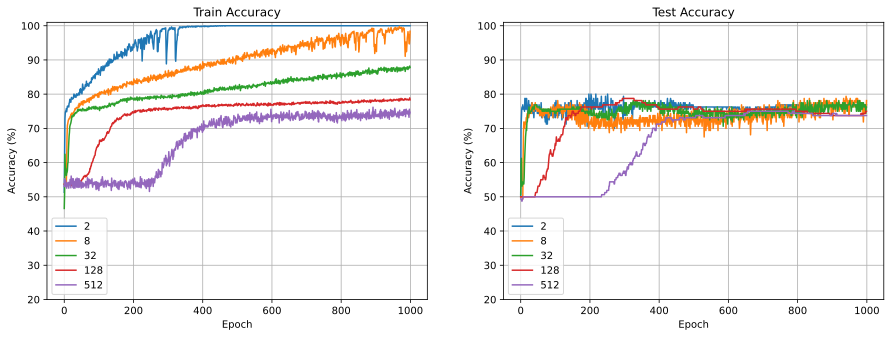

In [ ]:
# Reset matplotlib rcparameters
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Plot the results
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(accuracyResultsTrain)
ax[0].set_title("Train Accuracy")
ax[1].plot(accuracyResultsTest)
ax[1].set_title("Test Accuracy")

# Common features
for i in range(2):
    ax[i].legend(batchsizes)
    ax[i].set_xlabel("Epoch")
    ax[i].set_ylabel("Accuracy (%)")
    ax[i].set_ylim([20,101])
    ax[i].grid()

plt.show()
# It seems like the model is memorizing the data points, especially for small batches!

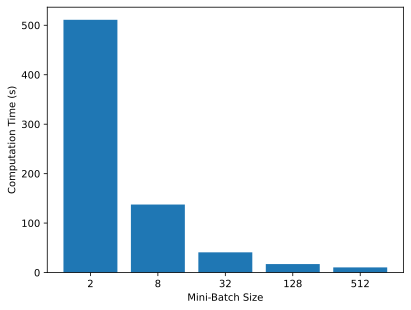

In [ ]:
# Bar plot of computation time
plt.bar(range(len(comptime)), comptime, tick_label=batchsizes)
plt.xlabel("Mini-Batch Size")
plt.ylabel("Computation Time (s)")
plt.show()

# Importance of Data Normalization

## The Iris Dataset (Previous Chapter)

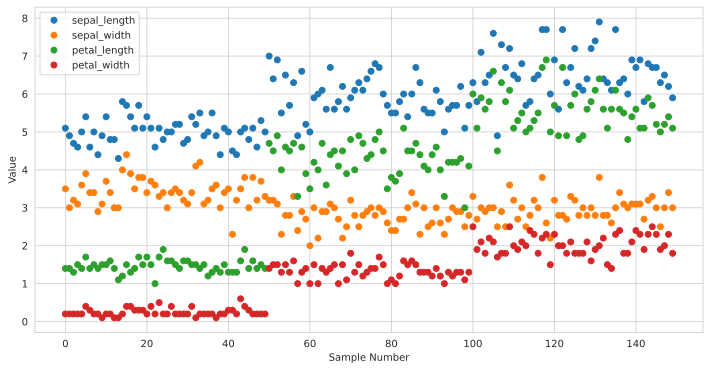

In [ ]:
# Import and convert iris dataset
import seaborn as sns
iris = sns.load_dataset("iris")

# Visualize data range
iris.plot(marker="o", linestyle="none", figsize=(12,6))
plt.xlabel("Sample Number")
plt.ylabel("Value")
plt.show()
# The ranges of data is quite colse

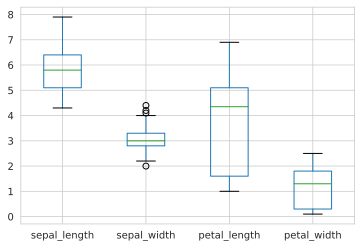

In [ ]:
# Use boxplot to confirm
boxplot = iris.boxplot()

In [ ]:
# Normalize the features
import scipy.stats as stats
cols2zscore = iris.keys()
cols2zscore = cols2zscore.drop("species")
iris[cols2zscore] = iris[cols2zscore].apply(stats.zscore)

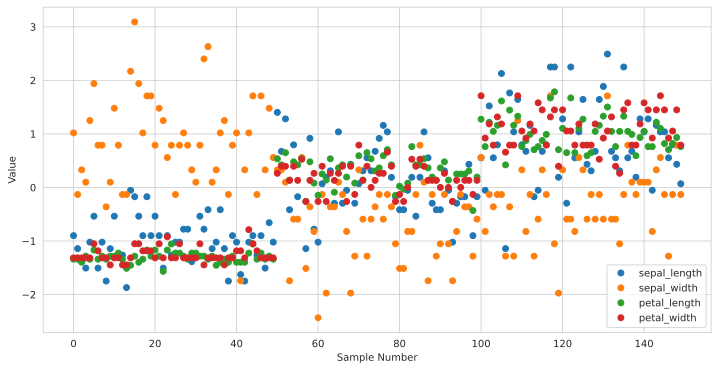

In [ ]:
# Visualize data range
iris.plot(marker="o", linestyle="none", figsize=(12,6))
plt.xlabel("Sample Number")
plt.ylabel("Value")
plt.show()
# Since the original data did not have that much variation, normalization does not have such big impact

## Wine Quality Dataset (No Normalization)

In [3]:
# Organize the data
# Download the data from original database
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep = ";")
# Remove the two outliers
data = data[data["total sulfur dioxide"] < 200]

# No normalization this time
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop("quality")

# Ceate the new boolean for quality
data["boolQuality"] = 0
data["boolQuality"][data["quality"] > 5] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
# Convert the data into tensors
dataT = torch.tensor(data[cols2zscore].values).float()
labels = torch.tensor(data["boolQuality"].values).float()

print(dataT.shape)
print(labels.shape)

# We need the labels to be tensor
labels = labels[:,None]
print(labels.shape)

torch.Size([1597, 11])
torch.Size([1597])
torch.Size([1597, 1])


In [5]:
# Split the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labels, test_size = 0.1)

# Convert to Pytorch datasets
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

In [ ]:
# Range the batch sizes
batchsizes = 2**np.arange(1,10,2)

# Initialize the output result matrices
accuracyResultsTrain = np.zeros((numepochs, len(batchsizes)))
accuracyResultsTest = np.zeros((numepochs, len(batchsizes)))

# Computational time
comptime = np.zeros(len(batchsizes))

test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

# Loop over the batch sizes
for bi in range(len(batchsizes)):
    # Start the timer
    starttime = time.process_time()

    # Create train loadr object for each iteration
    train_loader = DataLoader(train_data, batch_size=int(batchsizes[bi]), shuffle=True, drop_last=True)

    # Create and train a model
    winenet = ANNwine()
    trainAcc, testAcc, losses = trainTheModel()

    # Store the data
    accuracyResultsTrain[:,bi] = trainAcc
    accuracyResultsTest[:,bi] = testAcc

    # Computation time
    comptime[bi] = time.process_time() - starttime

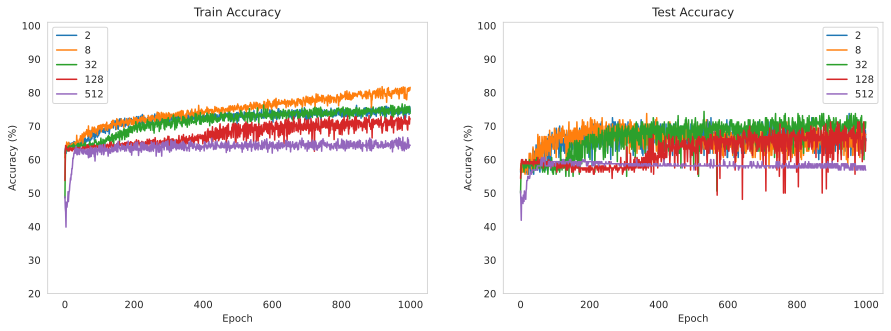

In [ ]:
# Plot the results
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(accuracyResultsTrain)
ax[0].set_title("Train Accuracy")
ax[1].plot(accuracyResultsTest)
ax[1].set_title("Test Accuracy")

# Common features
for i in range(2):
    ax[i].legend(batchsizes)
    ax[i].set_xlabel("Epoch")
    ax[i].set_ylabel("Accuracy (%)")
    ax[i].set_ylim([20,101])
    ax[i].grid()

plt.show()

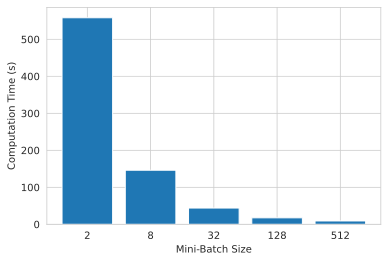

In [ ]:
# Bar plot of computation time
plt.bar(range(len(comptime)), comptime, tick_label=batchsizes)
plt.xlabel("Mini-Batch Size")
plt.ylabel("Computation Time (s)")
plt.show()

# Batch Normalization

In [6]:
# Again use the wine data, but normalize the raw data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep = ";")

data = data[data["total sulfur dioxide"] < 200]

# No normalization this time
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop("quality")
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

# Ceate the new boolean for quality
data["boolQuality"] = 0
data["boolQuality"][data["quality"] > 5] = 1

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,boolQuality
0,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0
1,-0.298673,1.966614,-1.391823,0.049020,0.222827,0.877032,0.654661,0.025923,-0.723652,0.127837,-0.583341,5,0
2,-0.298673,1.295976,-1.185980,-0.165951,0.095334,-0.081247,0.246069,0.132100,-0.334209,-0.049176,-0.583341,5,0
3,1.653579,-1.386577,1.489975,-0.452579,-0.265897,0.110409,0.434650,0.662984,-0.983280,-0.462207,-0.583341,6,1
4,-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307,5,0


In [7]:
# Convert the data into tensors
dataT = torch.tensor(data[cols2zscore].values).float()
labels = torch.tensor(data["boolQuality"].values).float()

print(dataT.shape)
print(labels.shape)

# We need the labels to be tensor
labels = labels[:,None]
print(labels.shape)

torch.Size([1597, 11])
torch.Size([1597])
torch.Size([1597, 1])


In [8]:
# Split the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labels, test_size = 0.1)

# Convert to Pytorch datasets
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Translate to dataloader objects
batchsize = 64
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [9]:
class ANNwine_withBNorm(nn.Module):
    def __init__(self):
        super().__init__()

        # Input layer
        self.input = nn.Linear(11,16)

        # Define two hidden layers
        self.fc1 = nn.Linear(16,32) # fc = fully connected
        self.bnorm1 = nn.BatchNorm1d(16) # Number of units into this layer
        self.fc2 = nn.Linear(32,20)
        self.bnorm2 = nn.BatchNorm1d(32) # Number of units into this layer

        # Define the output layer
        self.output = nn.Linear(20,1)

    # Forwad Pass
    def forward(self,x, doBN): # doBN is boolean (chose models with/without batch normalization)

        # Input (x starts off normalized, i.e., we normalized the raw data)
        x = F.relu(self.input(x))

        if doBN:
            # Hidden Layer 1
            x = self.bnorm1(x) # Batch normalization
            x = self.fc1(x)    # Weighted combination
            x = F.relu(x)      # Activation Function

            # Hidden Layer 2
            x = self.bnorm2(x) # Batch Normalization
            x = self.fc2(x)    # Weighted Combination
            x = F.relu(x)      # Activation Funcion

        else:
            # Hidden Layer 1
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))

        return self.output(x)

In [10]:
# Time to train
numepochs = 1000

def trainTheModel(doBN=True):

    # Loss function and optimizer
    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(winenet.parameters(), lr = 0.01)

    # Initialize the losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    # Loop over the epochs
    for epochi in range(numepochs):

        # switch on he training mode
        winenet.train()

        # Loop over the training data batches
        batchAcc = []
        batchLoss = []

        for X,y in train_loader:

            # Forward pass and loss
            yHat = winenet(X,doBN)
            loss = lossfun(yHat,y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from single batch
            batchLoss.append(loss.item())

            # Training Accuracy for single batch
            batchAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
        # End of the batch loop
        # Average training accuracy for batches in this epoch
        trainAcc.append(np.mean(batchAcc))

        # Average losses accross the baches
        losses[epochi] = np.mean(batchLoss)

        # test the accuracy
        winenet.eval()
        # Extract X and y from dataloader
        X,y = next(iter(test_loader))
        # deactivate autograd
        with torch.no_grad():
            yHat = winenet(X,doBN)
        testAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
    # Final output
    return trainAcc, testAcc, losses

In [11]:
# Create and Train a model with no batch normalization
winenet = ANNwine_withBNorm()
trainAccNo, testAccNo, lossesNo = trainTheModel(False)

# Create and train a model with batch normalization
winenet = ANNwine_withBNorm()
trainAccWith, testAccWith, lossesWith = trainTheModel(True)

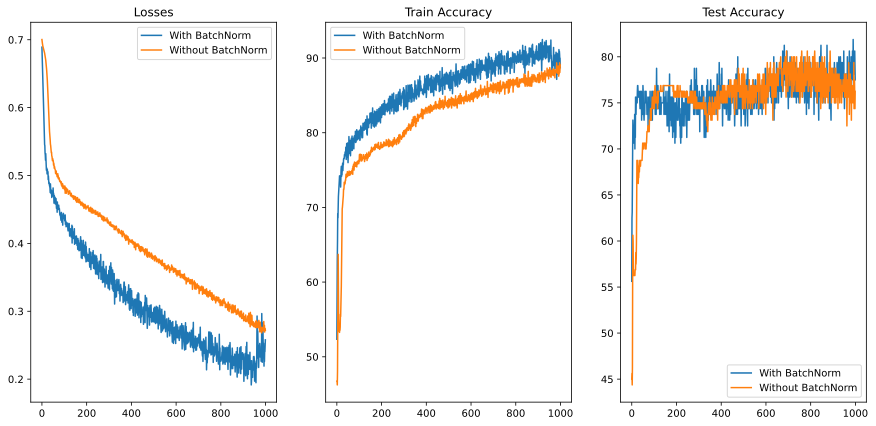

In [12]:
fig,ax = plt.subplots(1,3,figsize=(15,7))

ax[0].plot(lossesWith, label = "With BatchNorm")
ax[0].plot(lossesNo, label = "Without BatchNorm")
ax[0].set_title("Losses")
ax[0].legend()

ax[1].plot(trainAccWith, label = "With BatchNorm")
ax[1].plot(trainAccNo, label = "Without BatchNorm")
ax[1].set_title("Train Accuracy")
ax[1].legend()

ax[2].plot(testAccWith, label = "With BatchNorm")
ax[2].plot(testAccNo, label = "Without BatchNorm")
ax[2].set_title("Test Accuracy")
ax[2].legend()

plt.show()

# Code Challenge: Batch Normalize Synthetic Data

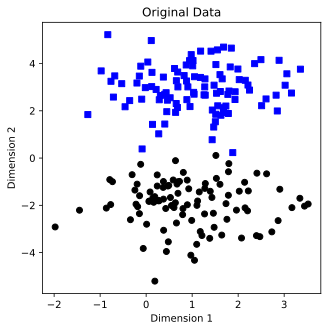

In [30]:
# Create linearly separable data as was done before
nPerClust = 100
blur = 1

# Create the centers
A = [1,3]
B = [1,-2]

# Generate The Data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))
data_np = np.hstack((a,b)).T

# Convert lists into tensors
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels == 0)[0],0], data[np.where(labels == 0)[0],1], "bs")
plt.plot(data[np.where(labels == 1)[0],0], data[np.where(labels == 1)[0],1], "ko")
plt.title("Original Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [33]:
# Create the DL model
def createANNmodel(learningRate):

    # Define the model Architecture
    ANNclassify = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.BatchNorm1d(16), # Add Batch Normalization
        nn.Linear(16,1),
        nn.ReLU(),
        nn.Linear(1,1),
        nn.Sigmoid(),
        )
    
    # Define the loss function
    lossfun = nn.BCELoss()

    # Define the Sigmoid Function
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

    return ANNclassify, lossfun, optimizer

In [36]:
# Define a function that trains the model
numepochs = 1000

def trainTheModel(ANNmodel):

    # Initialize the losses
    losses = torch.zeros(numepochs)

    # Loop over the epochs
    for epochi in range(numepochs):

        # Forward Pass
        yHat = ANNmodel(data)

        # Compute the loss
        loss = lossfun(yHat,labels)
        losses[epochi] = loss

        # Back Propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Final Forward Step
    predictions = ANNmodel(data)

    # Compute accuracy
    totalAcc = 100*torch.mean(((predictions > 0.5)==labels).float())

    return losses, predictions, totalAcc

In [37]:
# Run it once
ANNclassify, lossfun, optimizer = createANNmodel(0.01)

losses, predictions, totalacc = trainTheModel(ANNclassify)

print("Model Accuracy is {}%".format(totalacc))

Model Accuracy is 99.0%


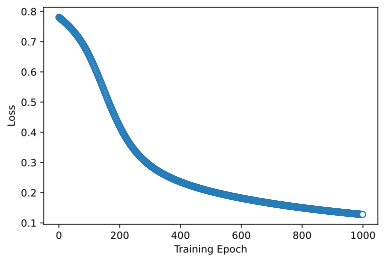

In [38]:
plt.plot(losses.detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.xlabel("Training Epoch")
plt.ylabel("Loss")
plt.show()

In [39]:
# Test for different learning rates
learningrates = np.linspace(0.001, 0.1, 50)

# Initialize accuracry vector for each learning rate
accByLr = []
allLosses = np.zeros((len(learningrates), numepochs))

for i, lr in enumerate(learningrates):

    # Create and run the model
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, predictions, totalacc = trainTheModel(ANNclassify)

    # Store the results
    accByLr.append(totalacc)
    allLosses[i,:] = losses.detach()

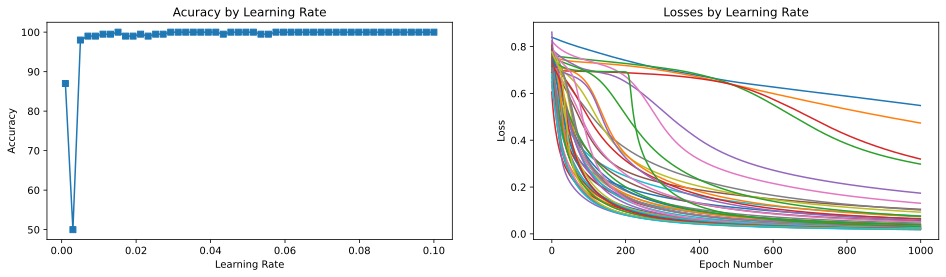

In [40]:
# Plot the whole thing
fig, ax = plt.subplots(1,2, figsize=(16,4))

ax[0].plot(learningrates, accByLr, "s-")
ax[0].set_xlabel("Learning Rate")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Acuracy by Learning Rate")

ax[1].plot(allLosses.T)
ax[1].set_xlabel("Epoch Number")
ax[1].set_ylabel("Loss")
ax[1].set_title("Losses by Learning Rate")

plt.show()
# Batch increased the accuracy crazily!

In [41]:
# Average Accuracy above 70%
sum(torch.tensor(accByLr)>70)/len(accByLr)

tensor(0.9800)

# Activation Functions

In [11]:
# In this section we will visualize the effects of activation functions depending on the input
# Create variables to evaluate over
x = torch.linspace(-3, 3, 101)

# Create a function that returns the activated output
def NNoutputx(actfun):
    """
    Get the activation function type
    replace torch.relu() with torch<actfun>
    """
    actfun = getattr(torch,actfun)
    return actfun(x)

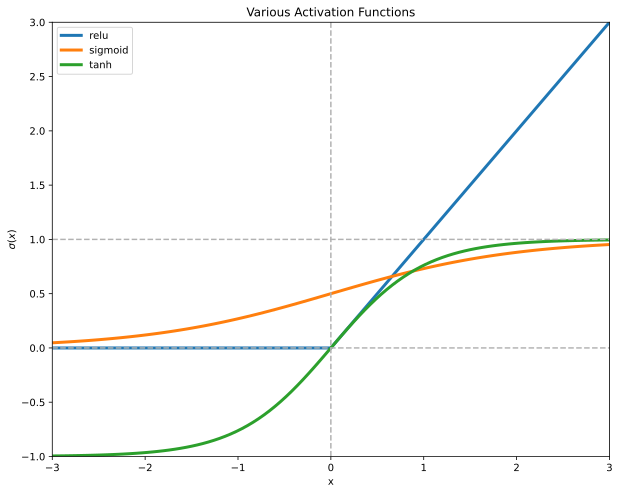

In [12]:
# The list of activation functions we are interested in
activation_functions = ["relu", "sigmoid", "tanh"]

fig = plt.figure(figsize=(10,8))

for actfun in activation_functions:
    plt.plot(x, NNoutputx(actfun), label=actfun, linewidth=3)

# Add reference lines to make it better-looking
dashlinecol = [0.7,0.7,0.7]
plt.plot(x[[0,-1]],[0,0], "--", color=dashlinecol)
plt.plot(x[[0,-1]],[1,1], "--", color=dashlinecol)
plt.plot([0,0], [-1,3], "--", color=dashlinecol)
plt.legend()
plt.xlabel("x")
plt.ylabel("$\sigma(x)$")
plt.title("Various Activation Functions")
plt.xlim(x[[0,-1]])
plt.ylim([-1,3])
plt.show()

In [13]:
# Create a function that returns the activatyed output function this time
def NNoutput(actfun):
    """
    Get the activation function type
    replace torch.nn.relu with torch.nn.<actfun>
    Output is the function itself
    """
    actfun = getattr(torch.nn,actfun)
    return actfun()

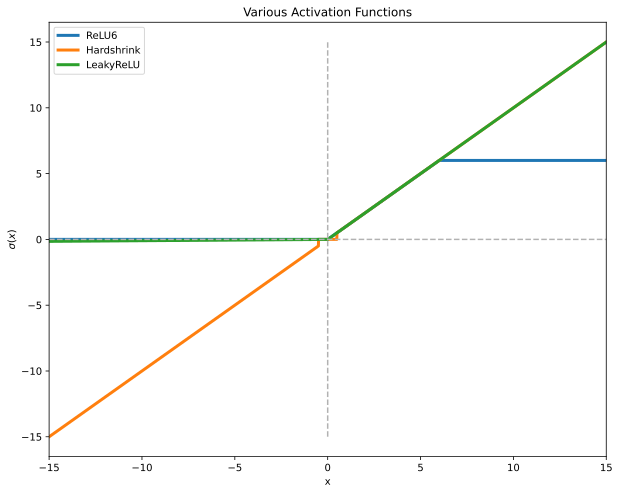

In [17]:
# Try these activation functions now
activation_functions = ["ReLU6", "Hardshrink", "LeakyReLU"]

# ReLU6 saturates at 6, so change te values of x accordingly
x = torch.linspace(-15, 15, 3001)


fig = plt.figure(figsize=(10,8))

for actfun in activation_functions:
    plt.plot(x, NNoutput(actfun)(x), label=actfun, linewidth=3)

# Add reference lines to make it better-looking
dashlinecol = [0.7,0.7,0.7]
plt.plot(x[[0,-1]],[0,0], "--", color=dashlinecol)
#plt.plot(x[[0,-1]],[1,1], "--", color=dashlinecol)
plt.plot([0,0], [-15,15], "--", color=dashlinecol)
plt.legend()
plt.xlabel("x")
plt.ylabel("$\sigma(x)$")
plt.title("Various Activation Functions")
plt.xlim(x[[0,-1]])
#plt.ylim([-1,3])
plt.show()

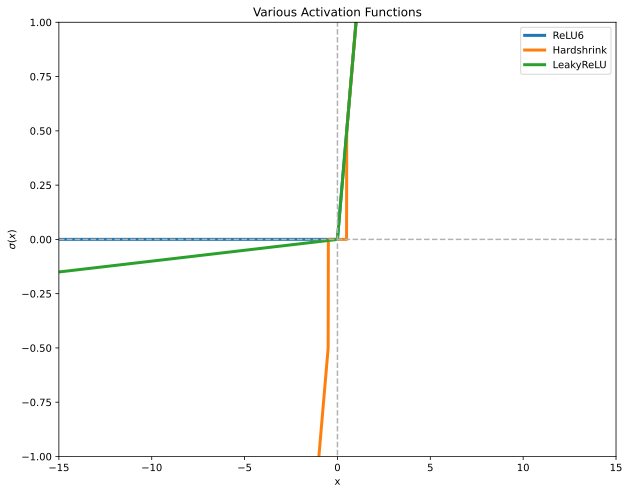

In [18]:
# Zoom in to the y-axis
fig = plt.figure(figsize=(10,8))

for actfun in activation_functions:
    plt.plot(x, NNoutput(actfun)(x), label=actfun, linewidth=3)

# Add reference lines to make it better-looking
dashlinecol = [0.7,0.7,0.7]
plt.plot(x[[0,-1]],[0,0], "--", color=dashlinecol)
#plt.plot(x[[0,-1]],[1,1], "--", color=dashlinecol)
plt.plot([0,0], [-15,15], "--", color=dashlinecol)
plt.legend()
plt.xlabel("x")
plt.ylabel("$\sigma(x)$")
plt.title("Various Activation Functions")
plt.xlim(x[[0,-1]])
plt.ylim([-1,1])
plt.show()

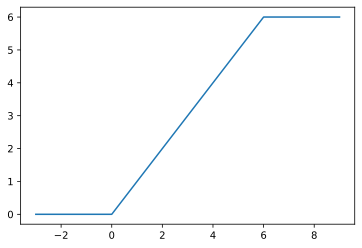

In [19]:
# Let's check ReLU6 in more detail
x = torch.linspace(-3,9,101)
relu6 = torch.nn.ReLU6()

plt.plot(x, relu6(x))
plt.show()

## Differences Between torch and torch.nn

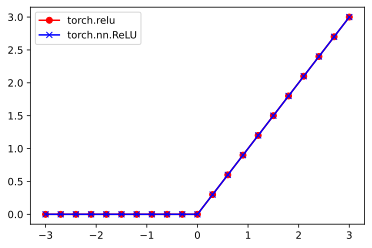

In [23]:
# redefine x again
x = torch.linspace(-3,3, 21)

# in torch
y1 = torch.relu(x)

# in torch.nn
f = torch.nn.ReLU()
y2 = f(x)

# Plot
plt.plot(x, y1, "ro-", label="torch.relu")
plt.plot(x,y2, "bx-", label="torch.nn.ReLU")
plt.legend()
plt.show()

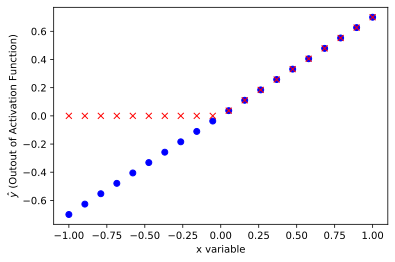

In [31]:
# Explore the difference between linear combintion and nonlinear activation
# Create 2 input vectors
x1 = torch.linspace(-1,1,20)
x2 = 2*x1

# define two weights
w1 = -0.3
w2 = 0.5

# Linear combination
linpart = x1*w1 + x2*w2

# Non-linear output
y = torch.relu(linpart)

plt.plot(x1, linpart, "bo", label="Linear Input")
plt.plot(x1, y, "rx", label="Non-Linear Output")
plt.ylabel("$\\hat{y}$ (Outout of Activation Function)")
plt.xlabel("x variable")
plt.show()

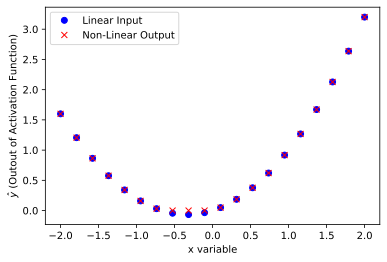

In [41]:
# set x2 to x1**2 and do the same
x1 = torch.linspace(-2,2,20)
x2 = x1**2

# define two weights
w1 = 0.4
w2 = 0.6

# Linear combination
linpart = x1*w1 + x2*w2

# Non-linear output
y = torch.relu(linpart)

plt.plot(x1, linpart, "bo", label="Linear Input")
plt.plot(x1, y, "rx", label="Non-Linear Output")
plt.ylabel("$\\hat{y}$ (Outout of Activation Function)")
plt.xlabel("x variable")
plt.legend()
plt.show()